In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split 
from sklearn import metrics

# New Section

In [ ]:
raw_mail_data = pd.read_csv('mail_data.csv',encoding = 'latin-1')

In [ ]:
raw_mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
mail_data.shape

(5572, 2)

In [ ]:
X = mail_data['Message']

Y = mail_data['Category']

In [ ]:
mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
mail_data.groupby('Category').describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

In [ ]:
mail_data['length'] = mail_data['Message'].apply(len)
mail_data.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


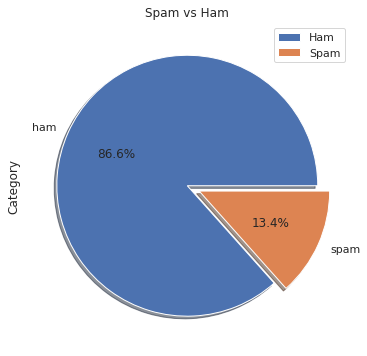

In [ ]:
mail_data["Category"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

Text(0, 0.5, 'Frequency')

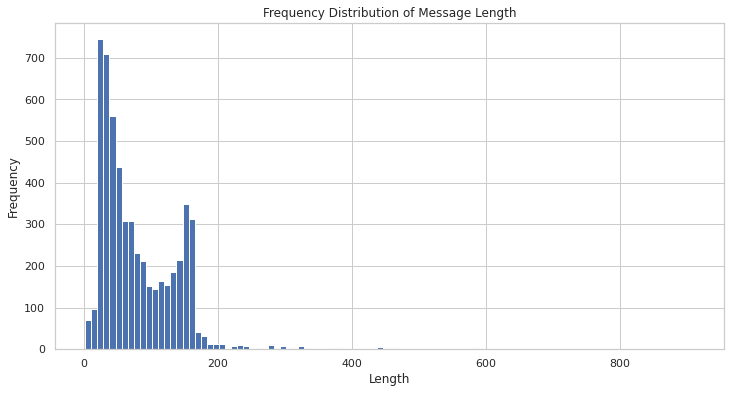

In [ ]:
plt.figure(figsize=(12,6))
mail_data['length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals) 
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [ ]:
def text_preprocess(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    
    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    
    return nostop

In [ ]:
spam_messages = mail_data[mail_data["Category"] == "spam"]["Message"]
ham_messages = mail_data[mail_data["Category"] == "ham"]["Message"]
print("No of spam messages : ",len(spam_messages))
print("No of ham messages : ",len(ham_messages))

No of spam messages :  747
No of ham messages :  4825


In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
spam_words = text_preprocess(spam_messages)

In [ ]:
# lets print some spam words
spam_words[:10]

['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may']

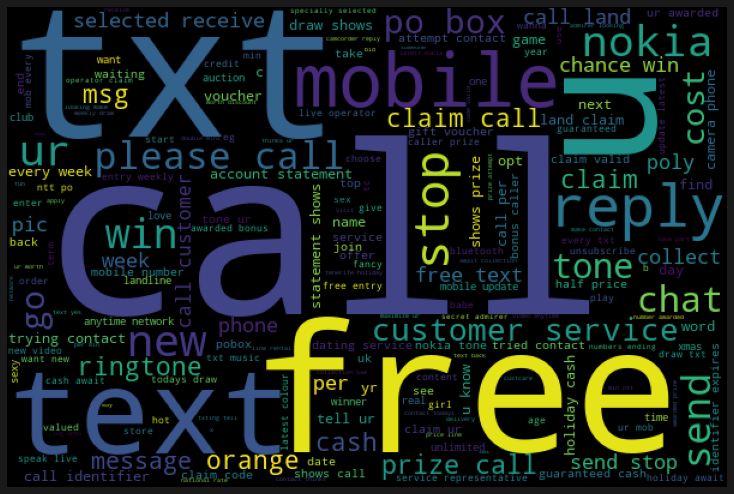

In [ ]:
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
print("Top 10 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(10))

Top 10 Spam words are :

call      327
free      146
txt       136
ur        129
mobile    108
text      107
claim     103
reply      98
u          96
stop       79
dtype: int64


In [ ]:
# This may take a while...
ham_words = text_preprocess(ham_messages)

In [ ]:
ham_words[:10]

['go',
 'jurong',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'cine']

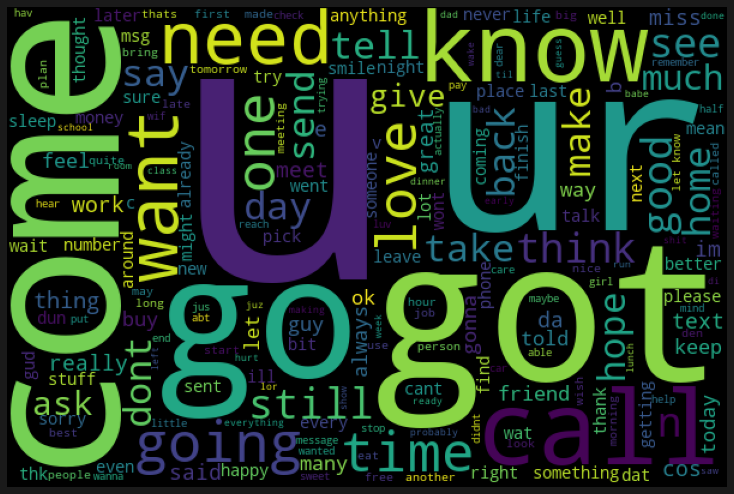

In [ ]:
ham_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
print("Top 10 Ham words are :\n")
print(pd.Series(ham_words).value_counts().head(10))

Top 10 Ham words are :

u        825
get      287
ur       241
go       234
like     217
got      217
come     204
know     202
call     201
going    151
dtype: int64


In [ ]:
mail_data.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# This might take a while....

# Lets remove punctuations/ stopwords from all SMS 
mail_data["Message"] = mail_data["Message"].apply(text_preprocess)

In [ ]:
mail_data["Message"] = mail_data["Message"].agg(lambda x: ' '.join(map(str, x)))

In [ ]:
mail_data.head()

,Category,Message,length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts may...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah dont think goes usf lives around though,61


In [ ]:
# Creating the Bag of Words

# Note the here we are passing already process messages (after removing punctuations and stopwords)

vectorizer = CountVectorizer()
bow_transformer = vectorizer.fit(mail_data['Message'])

print("20 Bag of Words (BOW) Features: \n")
print(vectorizer.get_feature_names()[20:40])

print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))

20 Bag of Words (BOW) Features: 

['absence', 'absolutely', 'abstract', 'abt', 'abta', 'aburo', 'abuse', 'abusers', 'ac', 'academic', 'acc', 'accent', 'accenture', 'accept', 'access', 'accessible', 'accidant', 'accident', 'accidentally', 'accommodation']

Total number of vocab words :  8129


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
message4 = mail_data['Message'][3]
print(message4)

u dun say early hor u c already say


In [ ]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 208)	1
  (0, 1986)	1
  (0, 2005)	1
  (0, 3158)	1
  (0, 5982)	2
(1, 8129)


In [ ]:
print(bow_transformer.get_feature_names()[5945])

samus


In [ ]:
messages_bow = bow_transformer.transform(mail_data['Message'])

In [ ]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 8129)
Amount of Non-Zero occurences:  44361


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [ ]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 5982)	0.619775084625881
  (0, 3158)	0.5143873498708452
  (0, 2005)	0.37159298853883077
  (0, 1986)	0.3423052157911949
  (0, 208)	0.3098875423129405


In [ ]:
print(bow_transformer.get_feature_names()[5945])
print(bow_transformer.get_feature_names()[3141])

samus
hoo


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['say']])

5.137052417837396


In [ ]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 8129)


In [ ]:
mail_data["Message"][:10]

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts may...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
5    freemsg hey darling weeks word back id like fu...
6       even brother like speak treat like aids patent
7    per request melle melle oru minnaminunginte nu...
8    winner valued network customer selected receiv...
9    mobile months u r entitled update latest colou...
Name: Message, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(mail_data["Message"])
print(features.shape)

print(len(vec.vocabulary_))

(5572, 7973)
7973


In [ ]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [ ]:
X= mail_data["Message"]
Y= mail_data["Category"]

In [ ]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [ ]:

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train_features)

  (0, 3080)	0.3620353828184515
  (0, 2468)	0.2749144117643914
  (0, 2180)	0.2749144117643914
  (0, 4992)	0.4024763662307231
  (0, 1133)	0.32058161618670633
  (0, 1837)	0.5012062615354291
  (0, 1313)	0.4492293394052595
  (1, 3263)	0.3282234439341122
  (1, 6370)	0.3731139851546701
  (1, 5646)	0.2242057363841177
  (1, 3103)	0.21829806435878513
  (1, 482)	0.4240158192000845
  (1, 3305)	0.2598110477810961
  (1, 2958)	0.4450581337321544
  (1, 3714)	0.25560089702733013
  (1, 2363)	0.38004382820977445
  (2, 4569)	0.27983132966539903
  (2, 2219)	0.27983132966539903
  (2, 3668)	0.27983132966539903
  (2, 56)	0.19490506844787117
  (2, 2705)	0.23895343488559248
  (2, 1637)	0.27983132966539903
  (2, 4470)	0.22136587618716008
  (2, 4124)	0.27983132966539903
  (2, 5296)	0.2666009257957545
  :	:
  (3897, 1994)	0.4707827029130888
  (3897, 4074)	0.4707827029130888
  (3897, 5183)	0.3946801487544614
  (3897, 2272)	0.32590798583458613
  (3897, 3714)	0.2703747489355071
  (3898, 1429)	0.3618265773317232
  (38

In [ ]:
print(Y_train)

1455    1
3460    0
2493    1
3378    1
3826    1
       ..
789     0
968     1
1667    1
3321    1
1688    0
Name: Category, Length: 3900, dtype: int64


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [ ]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
accuracy_on_training_data

0.9625641025641025

In [ ]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [ ]:
accuracy_on_test_data

0.9593301435406698

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_features, Y_train)

KNeighborsClassifier()

In [ ]:
X = mail_data['Message']

Y = mail_data['Category']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train_features)

  (0, 3080)	0.3620353828184515
  (0, 2468)	0.2749144117643914
  (0, 2180)	0.2749144117643914
  (0, 4992)	0.4024763662307231
  (0, 1133)	0.32058161618670633
  (0, 1837)	0.5012062615354291
  (0, 1313)	0.4492293394052595
  (1, 3263)	0.3282234439341122
  (1, 6370)	0.3731139851546701
  (1, 5646)	0.2242057363841177
  (1, 3103)	0.21829806435878513
  (1, 482)	0.4240158192000845
  (1, 3305)	0.2598110477810961
  (1, 2958)	0.4450581337321544
  (1, 3714)	0.25560089702733013
  (1, 2363)	0.38004382820977445
  (2, 4569)	0.27983132966539903
  (2, 2219)	0.27983132966539903
  (2, 3668)	0.27983132966539903
  (2, 56)	0.19490506844787117
  (2, 2705)	0.23895343488559248
  (2, 1637)	0.27983132966539903
  (2, 4470)	0.22136587618716008
  (2, 4124)	0.27983132966539903
  (2, 5296)	0.2666009257957545
  :	:
  (3897, 1994)	0.4707827029130888
  (3897, 4074)	0.4707827029130888
  (3897, 5183)	0.3946801487544614
  (3897, 2272)	0.32590798583458613
  (3897, 3714)	0.2703747489355071
  (3898, 1429)	0.3618265773317232
  (38

In [ ]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [ ]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
accuracy_on_training_data

0.9625641025641025

In [ ]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
accuracy_on_test_data

0.9593301435406698

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_features, Y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test_features)
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
ac_knn = accuracy_score(Y_test, y_pred)
ac_knn

0.9126794258373205

In [ ]:
model1 = GaussianNB()
model1.fit(X_train_features.toarray() , Y_train)


GaussianNB()

In [ ]:
y_pred1 = model1.predict(X_test_features.toarray())

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred1)
ac_gausnaive = accuracy_score(Y_test, y_pred1)
ac_gausnaive

0.8702153110047847

In [ ]:
model2 = BernoulliNB()
model2.fit(X_train_features.toarray() , Y_train)

BernoulliNB()

In [ ]:
y_pred2 = model2.predict(X_test_features.toarray())

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred2)
ac_bernoullinaive = accuracy_score(Y_test, y_pred2)
ac_bernoullinaive

0.9647129186602871

In [ ]:
model3 = MultinomialNB()
model3.fit(X_train_features.toarray() , Y_train)

MultinomialNB()

In [ ]:
y_pred3 = model3.predict(X_test_features.toarray())

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred3)
ac_multinaive = accuracy_score(Y_test, y_pred3)
ac_multinaive

0.9641148325358851

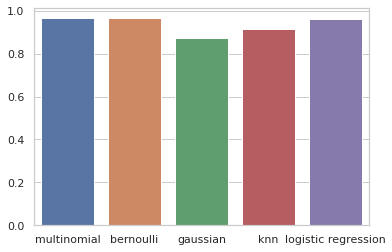

In [ ]:
sns.set_theme(style='whitegrid')
mean_train_scores = pd.DataFrame(data=[[ac_multinaive,ac_bernoullinaive,ac_gausnaive,ac_knn,accuracy_on_test_data]],
                                 columns=['multinomial', 'bernoulli','gaussian','knn','logistic regression'])
sns.barplot(data=mean_train_scores);

In [ ]:
def num_in_words(no):
    if(no==1):
        input_mail = ["Congratulations, you’ve won…!"]
        input_data_features = feature_extraction.transform(input_mail)
        prediction = model.predict(input_data_features.toarray())
        print(prediction)
        if (prediction==1):
            print('Ham mail')
        else:
            print('Spam mail')
        
    elif(no==2):
        input_mail = ["Congratulations, you’ve won…! please give your credit card number to put the amount"]
        input_data_features = feature_extraction.transform(input_mail)
        prediction = classifier.predict(input_data_features.toarray())
        print(prediction)
        if (prediction==1):
            print('Ham mail')
        else:
            print('Spam mail')
       
    elif(no==3):
        input_mail = ["Congratulations, you’ve won…! please give your credit card number to put the amount"]
        input_data_features = feature_extraction.transform(input_mail)
        prediction = model1.predict(input_data_features.toarray())
        print(prediction)
        if (prediction==1):
            print('Ham mail')
        else:
            print('Spam mail')
    elif(no==4):
        input_mail = ["Congratulations, you’ve won…!"]
        input_data_features = feature_extraction.transform(input_mail)
        prediction = model2.predict(input_data_features.toarray())
        print(prediction)
        if (prediction==1):
            print('Ham mail')
        else:
            print('Spam mail')
    elif(no==5):
        input_mail = ["Congratulations, you’ve won…!"]
        input_data_features = feature_extraction.transform(input_mail)
        prediction = model3.predict(input_data_features.toarray())
        print(prediction)
        if (prediction==1):
            print('Ham mail')
        else:
            print('Spam mail')
    else:
        print("please enter the valid model")
        
        
        

#1 logisticregression
#2 knn
#3 gaussnaive
#4 bernoulli naive
#5 multinomial naive
n = int(input("enter the valid number:"))    
num_in_words(n)

enter the valid number:1
[1]
Ham mail


In [ ]:
df = pd.read_csv('mail_data.csv',encoding = 'latin-1')

In [ ]:
hamdf =df[df['Category']=="ham"]
hamdf

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
spamdf =df[df['Category']=="spam"]

In [ ]:
hamdf = hamdf.sample(spamdf.shape[0])

In [ ]:
finaldf =hamdf.append(spamdf,ignore_index = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(finaldf['Message'],finaldf['Category'],test_size=.30, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
model = Pipeline([('tfidf',TfidfVectorizer()),('model',RandomForestClassifier(n_estimators=100 ,n_jobs = -1))])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', RandomForestClassifier(n_jobs=-1))])

In [ ]:
y_pred3 = model.predict(X_test)

In [ ]:
import pickle
pickle.dump(model, open('/content/random.sav','wb'))

In [ ]:
from sklearn.svm import SVC
svc = Pipeline([('tfidf',TfidfVectorizer()),('svc',SVC(C =1000,gamma='auto'))])

In [ ]:
svc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svc', SVC(C=1000, gamma='auto'))])

In [ ]:
y_pred3 = svc.predict(X_test)

In [ ]:
pickle.dump(model, open('/content/SVC.sav','wb'))

In [ ]:
from sklearn.linear_model import LogisticRegression
log = Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression())])

In [ ]:
log.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('log', LogisticRegression())])

In [ ]:
y_pred3 = log.predict(X_test)

In [ ]:
pickle.dump(model, open('/content/log.sav','wb'))